# Diabetes prediction dataset

Diabetes Prediction Dataset from Kaggle: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## Feature Engineering
### Visualising the data and performing feature engineering

* The result set is skewed, since most people in the study, as in life, do not have diabetes. This means that a machine learning model, however good or bad, is likely to most often guess the correct answer. Model accuracy therefore won't be the guiding factor for this dataset.

* The `smoking_history` column has some missing data. Since the "never" and "no info" categories have similar diabetes rates, these two categories may be lumped together (leaving the `smoking_history` column off completely did not influence the result much, so this could be considered). 

* There are no strong correlations between the features. The only correlation that appears to have some significance, albeit a low one, is that between `age` and `bmi`.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [70]:
# Reading in the data
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<AxesSubplot: xlabel='diabetes', ylabel='count'>

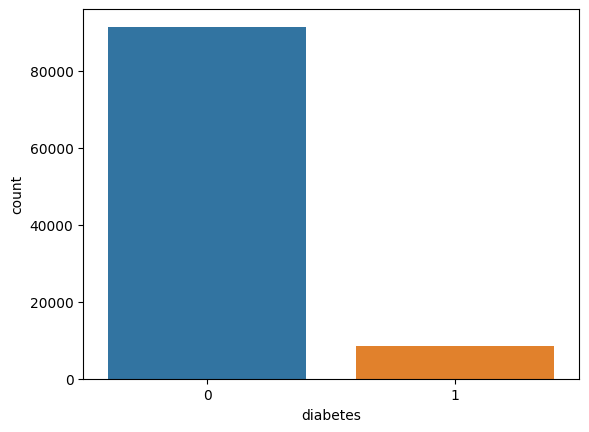

In [71]:
sns.countplot(x='diabetes',data=df)

<AxesSubplot: xlabel='hypertension', ylabel='count'>

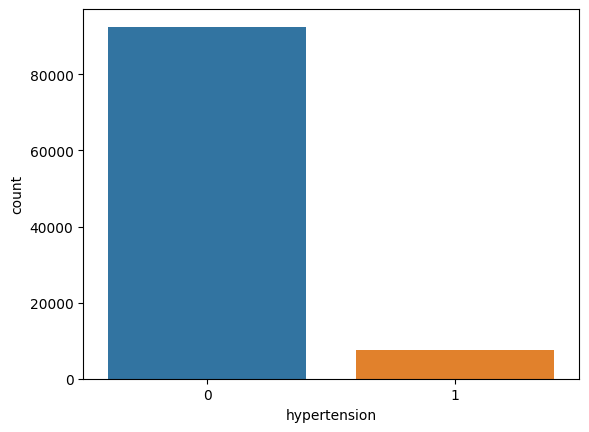

In [72]:
sns.countplot(x='hypertension',data=df)

<AxesSubplot: xlabel='heart_disease', ylabel='count'>

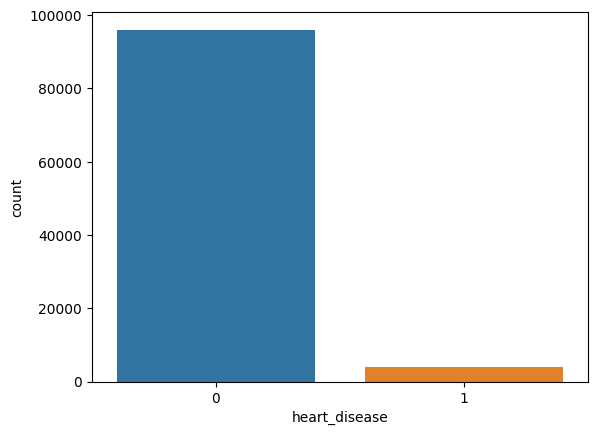

In [73]:
sns.countplot(x='heart_disease',data=df)

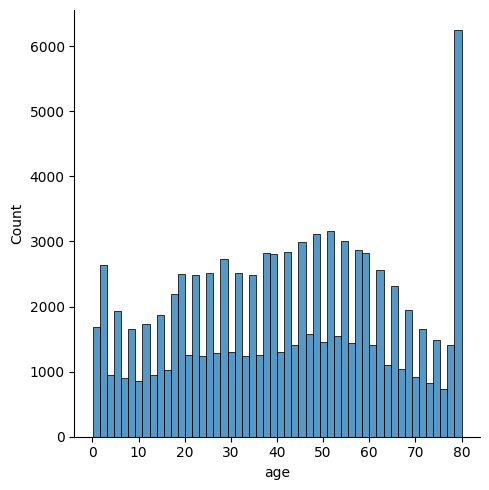

In [74]:
sns.displot(df['age'], kde=False)

<AxesSubplot: xlabel='age', ylabel='Density'>

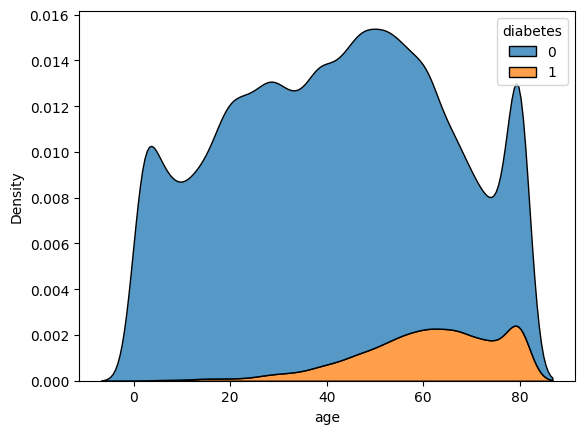

In [75]:
sns.kdeplot(data=df, x="age", hue="diabetes", multiple="stack")

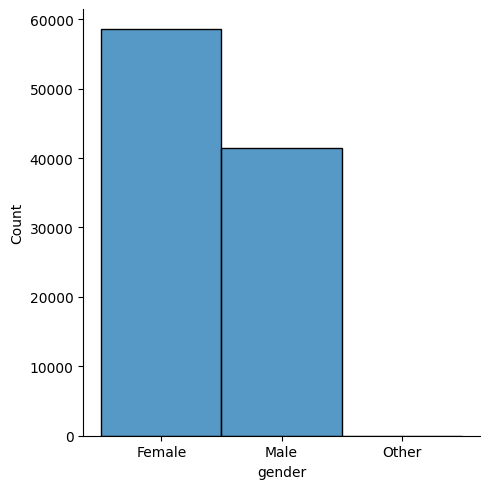

In [76]:
sns.displot(df['gender'], kde=False)

<AxesSubplot: xlabel='smoking_history', ylabel='count'>

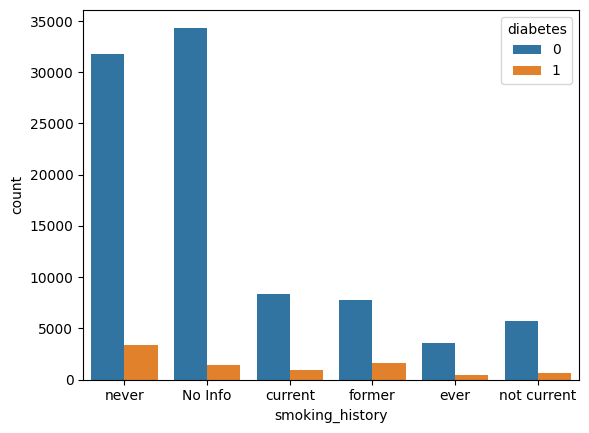

In [77]:
sns.countplot(x='smoking_history',hue='diabetes',data=df)

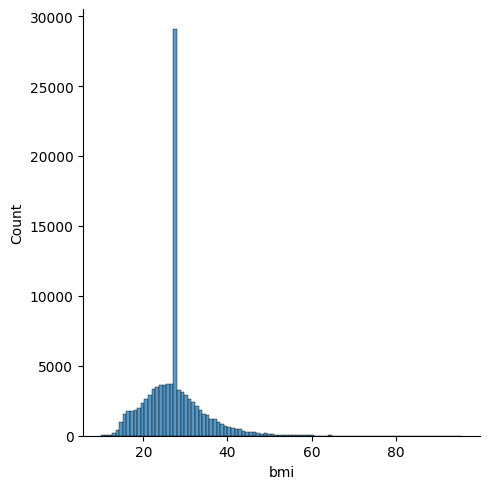

In [78]:
sns.displot(df['bmi'], kde=False, bins=100)

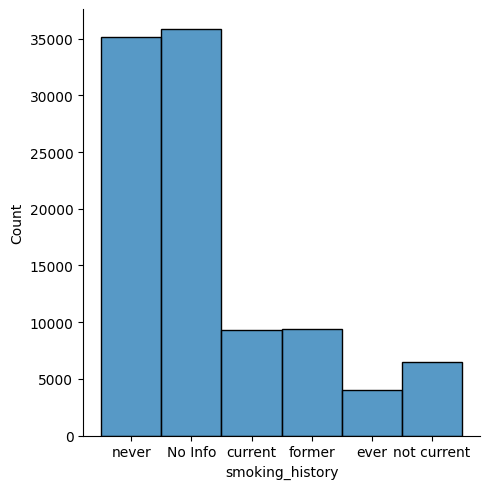

In [79]:
sns.displot(df['smoking_history'], kde=False)

In [80]:
# Confirming that there are no obvious missing data points
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [81]:
# Separating the y-values
y = df.iloc[:, 8].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
# Separating the X-values
X = df.iloc[:, 0:8]

In [83]:
# Mapping the categorical data
gender_mapping = {
    'Female': 0,
    'Male': 1,
    'Other': 2
}

X0 = X.iloc[:, 0:1].replace({'gender': gender_mapping})
X0

X['gender'] = X0

In [84]:
smoking_mapping = {
    'Never': 0,
    'No Info': 0,
    'current': 2,
    'former': 3,
    'not current': 4
}

X0 = X.iloc[:, 0:1].replace({'smoking_history': smoking_mapping})
X0

X['smoking_history'] = X0

<AxesSubplot: xlabel='smoking_history', ylabel='count'>

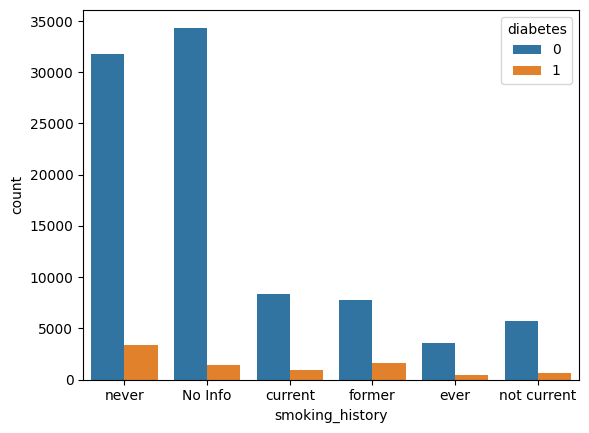

In [85]:
sns.countplot(data=df, x="smoking_history", hue="diabetes")

In [86]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,1,27.32,5.7,158
3,0,36.0,0,0,0,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,1,27.83,5.7,155
99998,0,24.0,0,0,0,35.42,4.0,100


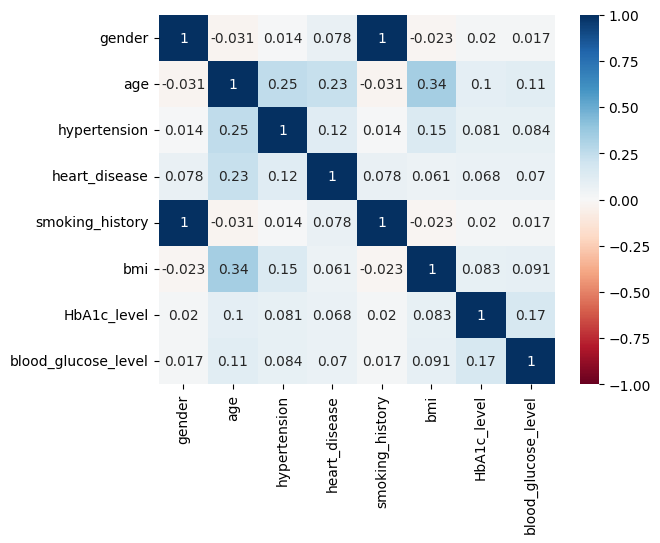

In [87]:
# Plot the correlation matrix
sns.heatmap(X.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True);

## Support Vector Machine

In [88]:
# Preparing the data for training and classification
X.to_numpy()

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[22877    18]
 [  859  1246]]


Confusion Matrix:


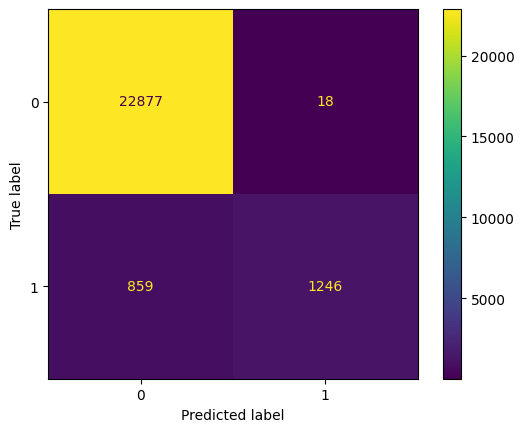

In [94]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
print("Confusion Matrix:\n", disp)

In [95]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     22895
           1       0.99      0.59      0.74      2105

    accuracy                           0.96     25000
   macro avg       0.97      0.80      0.86     25000
weighted avg       0.97      0.96      0.96     25000

